In this notebook, we are going to analyse the World Wide Covid19 Data with countrywise to draw the future insights of the Covid 19.

**Imports**

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df =pd.read_csv("/kaggle/input/corona-virus-report/country_wise_latest.csv")
df

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791,152,2,0,0.73,35.33,2.08,8916,1705,19.12,Eastern Mediterranean
183,Western Sahara,10,1,8,1,0,0,0,10.00,80.00,12.50,10,0,0.00,Africa
184,Yemen,1691,483,833,375,10,4,36,28.56,49.26,57.98,1619,72,4.45,Eastern Mediterranean
185,Zambia,4552,140,2815,1597,71,1,465,3.08,61.84,4.97,3326,1226,36.86,Africa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [10]:
df.isnull().sum()

Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [12]:
df["Country/Region"].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Greenland',
       'Grenada', 'Guatemala', 'Guinea', 'G

In [13]:
df["WHO Region"].unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'Western Pacific', 'South-East Asia'], dtype=object)

In [5]:
df[df.duplicated()]

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region


No Null Values

**We have cleaned our Dataset.Now we start analysis from here. We have checked for missing Value and Duplicated Values, checked for the format of Data,unwanted Column and any Discrepency etc..,**

Now, we are going to analyse the followingfrom the Dataset:

1. Total number of confirmed, death, recovered, active cases per WHO region.
2. Total number of confirmed,death, recovered, active cases per country



In [6]:
dataframe=df[['WHO Region','Confirmed','Deaths', 'Recovered', 'Active']].groupby('WHO Region').mean().round(2).sort_values(by='Confirmed', ascending=False)

dataframe

,Confirmed,Deaths,Recovered,Active
WHO Region,,,,
Americas,252551.03,9792.34,127674.74,115083.94
South-East Asia,183529.70,4134.90,115693.30,63701.50
Eastern Mediterranean,67761.09,1742.68,54609.09,11409.32
Europe,58920.05,3770.43,35602.20,19547.43
Western Pacific,18276.75,515.56,12923.12,4838.06
Africa,15066.81,254.65,9180.10,5632.06


In [11]:
dataframe=dataframe.reset_index()
dataframe

,WHO Region,Confirmed,Deaths,Recovered,Active
0,Americas,252551.03,9792.34,127674.74,115083.94
1,South-East Asia,183529.70,4134.90,115693.30,63701.50
2,Eastern Mediterranean,67761.09,1742.68,54609.09,11409.32
3,Europe,58920.05,3770.43,35602.20,19547.43
4,Western Pacific,18276.75,515.56,12923.12,4838.06
5,Africa,15066.81,254.65,9180.10,5632.06


In [12]:
data=dataframe[['WHO Region', 'Confirmed']]
data

,WHO Region,Confirmed
0,Americas,252551.03
1,South-East Asia,183529.70
2,Eastern Mediterranean,67761.09
3,Europe,58920.05
4,Western Pacific,18276.75
5,Africa,15066.81


([<matplotlib.patches.Wedge at 0x7f52b225d270>,
 [Text(0.299264004994136, 1.2239448742957624, 'Americas'),
  Text(-1.1131405759883746, -0.5903541802073309, 'South-East Asia'),
  Text(0.30095821897076985, -1.223529382742377, 'Eastern Mediterranean'),
  Text(0.993862896375305, -0.7744911511492495, 'Europe'),
  Text(1.2192137140062749, -0.31799043944594557, 'Western Pacific'),
  Text(1.2560298268981835, -0.0999453547800941, 'Africa')],
 [Text(0.171008002853792, 0.6993970710261499, '42.37%'),
  Text(-0.6360803291362139, -0.33734524583276054, '30.79%'),
  Text(0.17197612512615418, -0.6991596472813583, '11.37%'),
  Text(0.5679216550716027, -0.44256637208528543, '9.88%'),
  Text(0.6966935508607285, -0.1817088225405403, '3.07%'),
  Text(0.7177313296561049, -0.05711163130291091, '2.53%')])

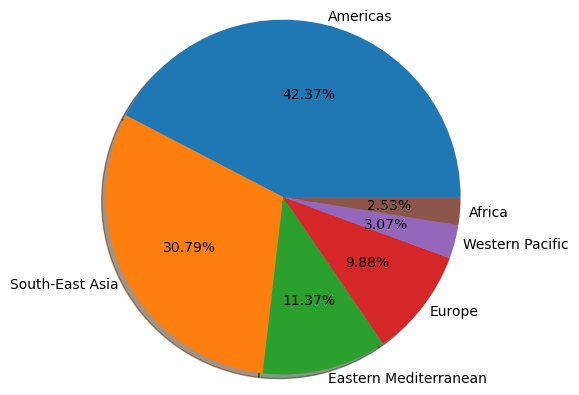

In [13]:
plt.pie(data['Confirmed'], labels=data['WHO Region'], shadow=True, autopct="%0.2f%%", radius=1.2, labeldistance=1.05)

**Total Number of Confirmed Cases per WHO Region**

In [4]:
dataframe1 =df[['Country/Region','Confirmed','Deaths','Recovered','Active']].groupby('Country/Region').mean().round(2).sort_values(by='Confirmed',ascending =False)

dataframe1 = dataframe1.reset_index().head(10)
dataframe1


,Country/Region,Confirmed,Deaths,Recovered,Active
0,US,4290259.0,148011.0,1325804.0,2816444.0
1,Brazil,2442375.0,87618.0,1846641.0,508116.0
2,India,1480073.0,33408.0,951166.0,495499.0
3,Russia,816680.0,13334.0,602249.0,201097.0
4,South Africa,452529.0,7067.0,274925.0,170537.0
5,Mexico,395489.0,44022.0,303810.0,47657.0
6,Peru,389717.0,18418.0,272547.0,98752.0
7,Chile,347923.0,9187.0,319954.0,18782.0
8,United Kingdom,301708.0,45844.0,1437.0,254427.0
9,Iran,293606.0,15912.0,255144.0,22550.0


([<matplotlib.patches.Wedge at 0x7f52ace4a0b0>,
 [Text(0.3962314927659173, 1.0261581769593286, 'US'),
  Text(-1.0984823651391695, 0.0577623880934343, 'Brazil'),
  Text(-0.5504815338749552, -0.9523497681328414, 'India'),
  Text(0.13117898061517125, -1.0921502071806628, 'Russia'),
  Text(0.5032888933282144, -0.9781105713836558, 'South Africa'),
  Text(0.7194084449739304, -0.8321367010895455, 'Mexico'),
  Text(0.8836960345834441, -0.6550429897812025, 'Peru'),
  Text(0.9993280598686171, -0.4597210336271617, 'Chile'),
  Text(1.0660451970158118, -0.2711966775598832, 'United Kingdom'),
  Text(1.0962785966985245, -0.09040596451957279, 'Iran')],
 [Text(0.28816835837521254, 0.7462968559704208, '38.27%'),
  Text(-0.7988962655557597, 0.04200900952249767, '21.79%'),
  Text(-0.40035020645451286, -0.692618013187521, '13.20%'),
  Text(0.09540289499285182, -0.7942910597677547, '7.29%'),
  Text(0.36602828605688315, -0.7113531428244769, '4.04%'),
  Text(0.5232061417992221, -0.605190328065124, '3.53%'),
 

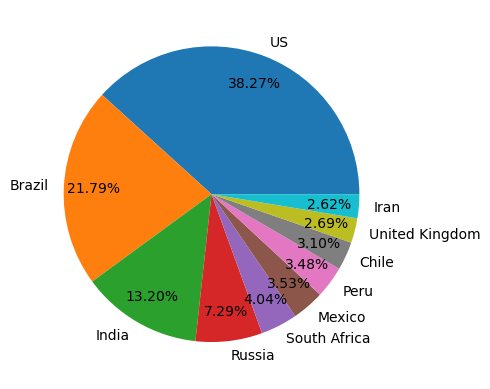

In [29]:
plt.pie(dataframe1['Confirmed'], labels=dataframe1['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

**Top 10 Countries having Maximum No of COnfirmed Cases.**

([<matplotlib.patches.Wedge at 0x7f52acc29360>,
 [Text(0.49921731884789206, 0.9801949135566468, 'US'),
  Text(-1.0537159901729898, 0.315725532787191, 'Brazil'),
  Text(-0.9027992578057705, -0.6284532600801352, 'India'),
  Text(-0.635000219052979, -0.8982063915396443, 'Russia'),
  Text(-0.4920887986163138, -0.9837929732806354, 'South Africa'),
  Text(-0.09252021268805796, -1.0961021896904306, 'Mexico'),
  Text(0.4077318305661447, -1.0216431638997938, 'Peru'),
  Text(0.6072657260464421, -0.9171850074926474, 'Chile'),
  Text(0.9218657143459077, -0.6001363217749025, 'United Kingdom'),
  Text(1.092321210423798, -0.12974734393539325, 'Iran')],
 [Text(0.36306714098028514, 0.7128690280411977, '35.01%'),
  Text(-0.7663389019439926, 0.22961856929977525, '20.72%'),
  Text(-0.6565812784041967, -0.45705691642191654, '7.90%'),
  Text(-0.46181834112943926, -0.6532410120288322, '3.15%'),
  Text(-0.3578827626300464, -0.715485798749553, '1.67%'),
  Text(-0.0672874274094967, -0.7971652288657677, '10.41%'

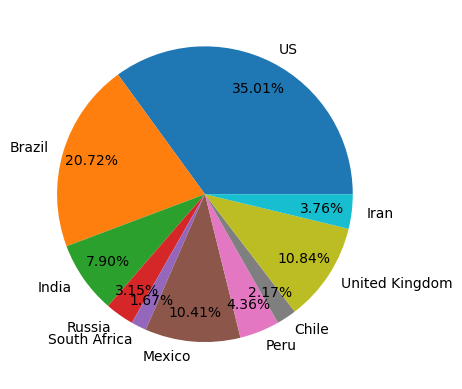

In [30]:
plt.pie(dataframe1['Deaths'], labels=dataframe1['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

**Top 10 Countries having Maximum No of Deaths**

([<matplotlib.patches.Wedge at 0x7f52acb7cbb0>,
 [Text(0.857502306809797, 0.6889773536306378, 'US'),
  Text(-0.7299943068529798, 0.8228659137199922, 'Brazil'),
  Text(-0.9181687582017196, -0.6057772952680813, 'India'),
  Text(-0.21263805834327393, -1.0792520818344538, 'Russia'),
  Text(0.27564449603188323, -1.0649038040158036, 'South Africa'),
  Text(0.5737765859156612, -0.9384990300767327, 'Mexico'),
  Text(0.8212963337726671, -0.7317597502811807, 'Peru'),
  Text(1.0019952660627285, -0.45387827309520135, 'Chile'),
  Text(1.062675428847803, -0.2841142955275882, 'United Kingdom'),
  Text(1.0906814242055007, -0.1428776780783511, 'Iran')],
 [Text(0.6236380413162159, 0.5010744390041002, '21.54%'),
  Text(-0.5309049504385308, 0.5984479372509034, '30.01%'),
  Text(-0.6677590968739779, -0.4405653056495137, '15.46%'),
  Text(-0.1546458606132901, -0.7849106049705119, '9.79%'),
  Text(0.20046872438682417, -0.7744754938296754, '4.47%'),
  Text(0.4172920624841172, -0.6825447491467147, '4.94%'),
  

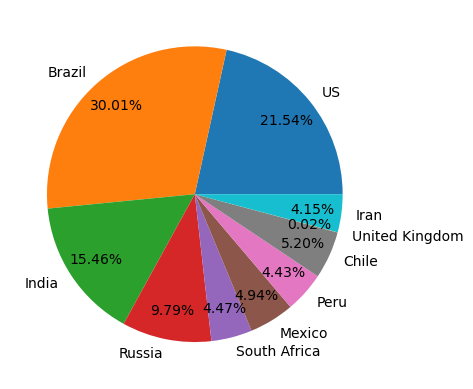

In [32]:
plt.pie(dataframe1['Recovered'], labels=dataframe1['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

Top 10 Countries 

([<matplotlib.patches.Wedge at 0x7ee88744f130>,
 [Text(-0.36543784981052607, 1.0375235794553586, 'US'),
  Text(-0.5740246409509211, -0.9383473299270192, 'Brazil'),
  Text(0.14413318161141703, -1.0905162199429088, 'India'),
  Text(0.6244392194436217, -0.9055802897703995, 'Russia'),
  Text(0.8304825467718822, -0.7213173639302528, 'South Africa'),
  Text(0.9277266659240166, -0.5910357293205785, 'Mexico'),
  Text(0.9817301413606444, -0.4961914242951095, 'Peru'),
  Text(1.0181116541618218, -0.41647167930110074, 'Chile'),
  Text(1.0773975299062803, -0.2218435542265002, 'United Kingdom'),
  Text(1.0998714514387302, -0.01681637029982902, 'Iran')],
 [Text(-0.2657729816803826, 0.7545626032402607, '60.78%'),
  Text(-0.41747246614612443, -0.6824344217651048, '10.97%'),
  Text(0.10482413208103057, -0.7931027054130245, '10.69%'),
  Text(0.45413761414081577, -0.658603847105745, '4.34%'),
  Text(0.603987306743187, -0.5245944464947293, '3.68%'),
  Text(0.6747103024901939, -0.42984416677860254, '1.03%')

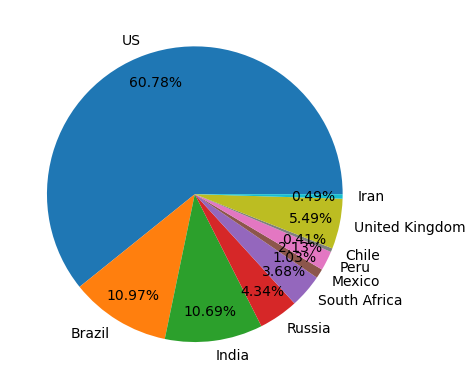

In [5]:
plt.pie(dataframe1['Active'], labels=dataframe1['Country/Region'], autopct="%0.2f%%",pctdistance=0.8)

**Top 10 Countries having Active Cases**

In [6]:
df.head(10)

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region
0,Afghanistan,36263,1269,25198,9796,106,10,18,3.50,69.49,5.04,35526,737,2.07,Eastern Mediterranean
1,Albania,4880,144,2745,1991,117,6,63,2.95,56.25,5.25,4171,709,17.00,Europe
2,Algeria,27973,1163,18837,7973,616,8,749,4.16,67.34,6.17,23691,4282,18.07,Africa
3,Andorra,907,52,803,52,10,0,0,5.73,88.53,6.48,884,23,2.60,Europe
4,Angola,950,41,242,667,18,1,0,4.32,25.47,16.94,749,201,26.84,Africa
5,Antigua and Barbuda,86,3,65,18,4,0,5,3.49,75.58,4.62,76,10,13.16,Americas
6,Argentina,167416,3059,72575,91782,4890,120,2057,1.83,43.35,4.21,130774,36642,28.02,Americas
7,Armenia,37390,711,26665,10014,73,6,187,1.90,71.32,2.67,34981,2409,6.89,Europe
8,Australia,15303,167,9311,5825,368,6,137,1.09,60.84,1.79,12428,2875,23.13,Western Pacific
9,Austria,20558,713,18246,1599,86,1,37,3.47,88.75,3.91,19743,815,4.13,Europe


In [11]:
dataframe2 = df[['Country/Region','New cases','New deaths','New recovered']].groupby('Country/Region').mean().round(2).sort_values(by='New cases',ascending=False)

dataframe2

,New cases,New deaths,New recovered
Country/Region,,,
US,56336.0,1076.0,27941.0
India,44457.0,637.0,33598.0
Brazil,23284.0,614.0,33728.0
Colombia,16306.0,508.0,11494.0
Peru,13756.0,575.0,4697.0
...,...,...,...
Spain,0.0,0.0,0.0
Equatorial Guinea,0.0,0.0,0.0
Liechtenstein,0.0,0.0,0.0


In [12]:
dataframe2 = dataframe2.reset_index()[0:10]
dataframe2

,Country/Region,New cases,New deaths,New recovered
0,US,56336.0,1076.0,27941.0
1,India,44457.0,637.0,33598.0
2,Brazil,23284.0,614.0,33728.0
3,Colombia,16306.0,508.0,11494.0
4,Peru,13756.0,575.0,4697.0
5,South Africa,7096.0,298.0,9848.0
6,Russia,5607.0,85.0,3077.0
7,Mexico,4973.0,342.0,8588.0
8,Argentina,4890.0,120.0,2057.0
9,Bangladesh,2772.0,37.0,1801.0


<Axes: xlabel='New cases', ylabel='Country/Region'>

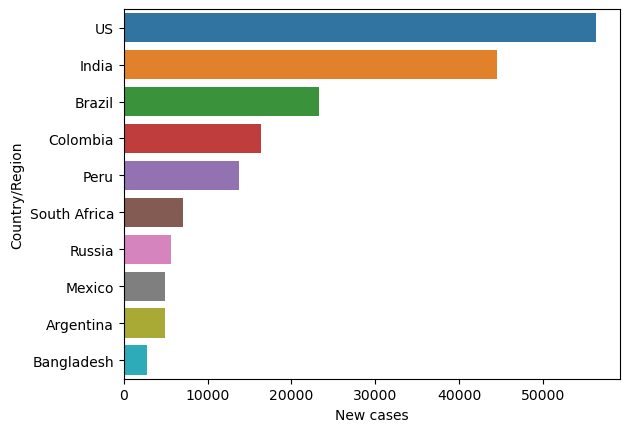

In [13]:
sns.barplot(y='Country/Region',x='New cases',data=dataframe2)

**Top 10 Countries Affected with New Cases.**

<Axes: xlabel='New deaths', ylabel='Country/Region'>

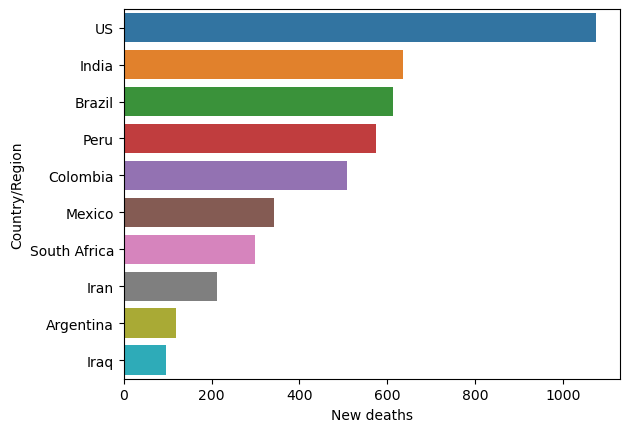

In [16]:
dataframe2 = df[['Country/Region','New deaths']].sort_values(by='New deaths',ascending=False)[0:10]


sns.barplot(y='Country/Region',x='New deaths',data=dataframe2)

**Top 10 Countries affected with New Deaths**

<Axes: xlabel='New recovered', ylabel='Country/Region'>

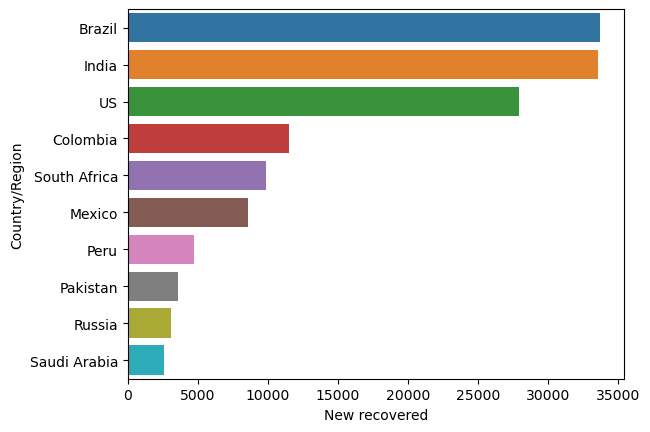

In [17]:
dataframe2 = df[['Country/Region','New recovered']].sort_values(by='New recovered',ascending=False)[0:10]

sns.barplot(y='Country/Region',x='New recovered',data=dataframe2)

****Top 10 Countries of NewRecovered from Cases**

<Axes: xlabel='Confirmed last week', ylabel='Country/Region'>

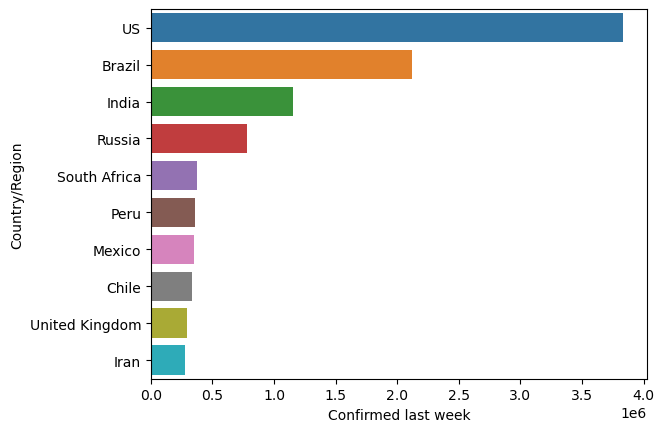

In [21]:
dataframe3= df[['WHO Region','Country/Region', 'Confirmed last week']].groupby(['WHO Region','Country/Region']).mean().round(2).sort_values(by='Confirmed last week', ascending=False).reset_index()[0:10]
dataframe3

sns.barplot(y='Country/Region',x='Confirmed last week',data=dataframe3)